# YouTube—USvideos.csv数据集分析

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
import datetime
df = pd.read_csv("/home/wangxuefei/Downloads/Dataset/youtube-new/USvideos.csv")

## 打印数据集前5行熟悉一下数据集

In [2]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


## 查看关于数据集的信息

#### 得到数据集有40949行，16列，其中布尔类型3列，数值类型5列，标称类型8列， 除“description”属性外，其余属性均无缺失值

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
video_id                  40949 non-null object
trending_date             40949 non-null object
title                     40949 non-null object
channel_title             40949 non-null object
category_id               40949 non-null int64
publish_time              40949 non-null object
tags                      40949 non-null object
views                     40949 non-null int64
likes                     40949 non-null int64
dislikes                  40949 non-null int64
comment_count             40949 non-null int64
thumbnail_link            40949 non-null object
comments_disabled         40949 non-null bool
ratings_disabled          40949 non-null bool
video_error_or_removed    40949 non-null bool
description               40379 non-null object
dtypes: bool(3), int64(5), object(8)
memory usage: 4.2+ MB


## 一、统计标称属性信息

In [4]:
df.describe(include = ['O'])

,video_id,trending_date,title,channel_title,publish_time,tags,thumbnail_link,description
count,40949,40949,40949,40949,40949,40949,40949,40379
unique,6351,205,6455,2207,6269,6055,6352,6901
top,j4KvrAUjn6c,18.24.02,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,ESPN,2018-05-18T14:00:04.000Z,[none],https://i.ytimg.com/vi/j4KvrAUjn6c/default.jpg,► Listen LIVE: http://power1051fm.com/\n► Face...
freq,30,200,30,203,50,1535,30,58


#### 观察上表可得，对于标称属性，每个属性的可能取值较多(看unique列)，占用了太多版面，故在此只选取了“trending_date”属性打印出了每个可能取值的频数，其余属性的频数统计依次类推。 

In [5]:
df['trending_date'].value_counts()

18.24.02    200
18.15.04    200
17.30.12    200
17.30.11    200
18.23.03    200
18.23.01    200
18.23.05    200
17.03.12    200
17.01.12    200
17.04.12    200
17.12.12    200
17.07.12    200
17.08.12    200
17.02.12    200
17.31.12    200
18.30.05    200
18.15.01    200
18.30.03    200
18.30.01    200
18.08.05    200
18.08.06    200
18.08.01    200
18.21.02    200
18.21.03    200
18.21.01    200
18.21.04    200
18.03.01    200
18.01.03    200
18.01.01    200
18.01.06    200
           ... 
18.05.02    199
18.06.02    199
18.03.03    199
18.18.03    199
18.19.03    199
18.12.03    199
18.08.03    199
18.23.02    199
18.14.02    199
18.15.02    199
18.15.05    199
18.13.02    199
18.13.03    199
18.22.02    199
18.20.03    199
18.07.03    199
18.15.03    199
18.29.01    199
18.07.02    199
18.26.02    199
18.27.02    198
18.14.03    198
18.16.03    198
18.12.02    198
18.17.03    198
18.01.02    197
18.31.01    197
18.03.02    196
18.04.02    196
18.02.02    196
Name: trending_date, Len

### 由上面的统计频数不能很直观的得出有意义的结论，所以下面分别按年份和星期几统计热门视频的分布

In [6]:
from matplotlib import pyplot as plt
import seaborn as sns

PLOT_COLORS = ["#268bd2", "#0052CC", "#FF5722", "#b58900", "#003f5c"]

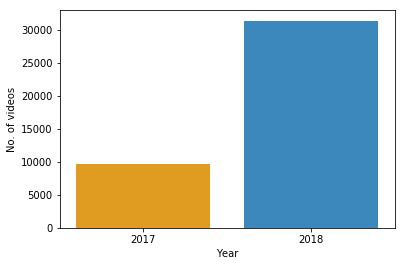

In [7]:
cdf = df["trending_date"].apply(lambda x: '20' + x[:2]).value_counts() \
            .to_frame().reset_index() \
            .rename(columns={"index": "year", "trending_date": "No_of_videos"})

fig, ax = plt.subplots()
_ = sns.barplot(x="year", y="No_of_videos", data=cdf, 
                palette=sns.color_palette(['#ffa600', '#268bd2'], n_colors=7), ax=ax)
_ = ax.set(xlabel="Year", ylabel="No. of videos")

#### 结论： 由上图看出，2018年热门视频的数量较多

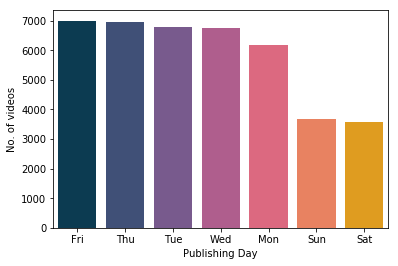

In [8]:
df["publishing_day"] = df["publish_time"].apply(
    lambda x: datetime.datetime.strptime(x[:10], "%Y-%m-%d").date().strftime('%a'))
df["publishing_hour"] = df["publish_time"].apply(lambda x: x[11:13])
df.drop(labels='publish_time', axis=1, inplace=True)

cdf = df["publishing_day"].value_counts()\
        .to_frame().reset_index().rename(columns={"index": "publishing_day", "publishing_day": "No_of_videos"})
fig, ax = plt.subplots()
_ = sns.barplot(x="publishing_day", y="No_of_videos", data=cdf, 
                palette=sns.color_palette(['#003f5c', '#374c80', '#7a5195', 
                                           '#bc5090', '#ef5675', '#ff764a', '#ffa600'], n_colors=7), ax=ax)
_ = ax.set(xlabel="Publishing Day", ylabel="No. of videos")

#### 结论：由上图看出，分布在周一到周五的热门视频数量较多，周六、周日相对较少

## 分别对三个布尔属性统计每个可能值的频数

In [9]:
df["video_error_or_removed"].value_counts()

False    40926
True        23
Name: video_error_or_removed, dtype: int64

In [10]:
df["comments_disabled"].value_counts(normalize=True)

False    0.984542
True     0.015458
Name: comments_disabled, dtype: float64

In [11]:
df["ratings_disabled"].value_counts()

False    40780
True       169
Name: ratings_disabled, dtype: int64

## 二、统计数值属性信息

### 1、下面的表格列出了每个数值属性的最大、最小、均值、中位数、四分数， 缺失值个数由上面 df.info() 得到，均为0

In [12]:
df.describe()

,category_id,views,likes,dislikes,comment_count
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


### 2、下面分别对每个数值属性绘制直方图、盒图，并用qq图检验其分布是否为正态分布

### （1） "views"(观看量)统计

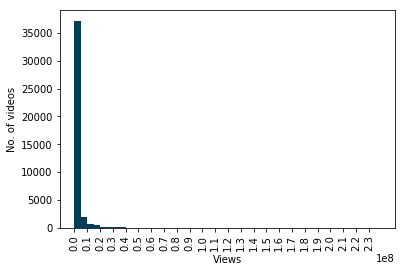

In [13]:
fig, ax = plt.subplots()
_ = sns.distplot(df["views"], kde=False, color=PLOT_COLORS[4], 
                 hist_kws={'alpha': 1}, bins=np.linspace(0, 2.3e8, 47), ax=ax)
_ = ax.set(xlabel="Views", ylabel="No. of videos", xticks=np.arange(0, 2.4e8, 1e7))
_ = ax.set_xlim(right=2.5e8)
_ = plt.xticks(rotation=90)

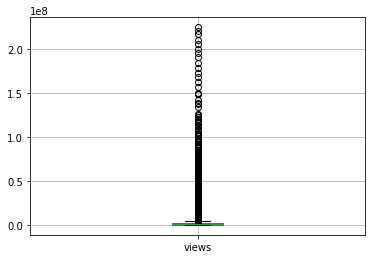

In [14]:
pd.DataFrame({"views":df["views"]}).boxplot()

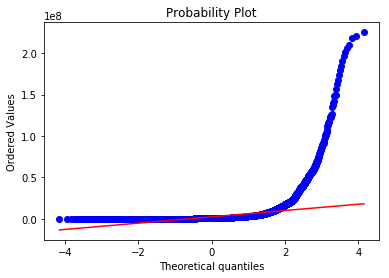

In [15]:
stats.probplot(df["views"], dist="norm", plot=plt)
plt.show()

### 结论：由直方图看出，"views"（热门视频的观看量）大部分分布在5百万左右；由盒图看到离群点较多，即除了数据集中分布的区域以外，还有较多数据在一个大的范围内呈不均匀分布，其中分布在5million~0.12billion的点较多；由qq图看出，数据没有近似地在一条直线附近，即不符合正态分布

### （2） "likes" 属性统计

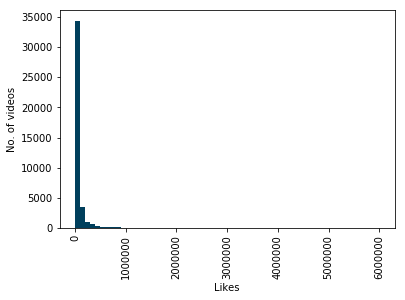

In [16]:
plt.rc('figure.subplot', wspace=0.9)
fig, ax = plt.subplots()
_ = sns.distplot(df["likes"], kde=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, 
                 bins=np.linspace(0, 6e6, 61), ax=ax)
_ = ax.set(xlabel="Likes", ylabel="No. of videos")
_ = plt.xticks(rotation=90)

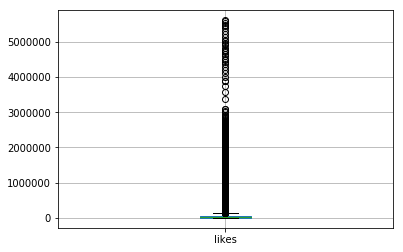

In [17]:
pd.DataFrame({"likes":df["likes"]}).boxplot()

((array([-4.14586123, -3.93796769, -3.8245419 , ...,  3.8245419 ,
          3.93796769,  4.14586123]),
  array([      0,       0,       0, ..., 5530568, 5595203, 5613827])),
 (122168.26032450395, 74266.70243473585, 0.5337065548991708))

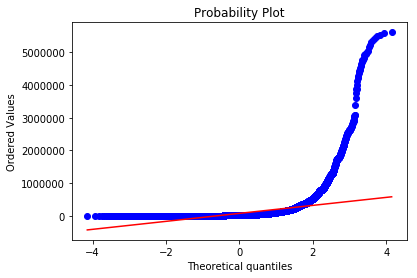

In [18]:
stats.probplot(df["likes"], dist="norm", plot=plt)
#plt.show()

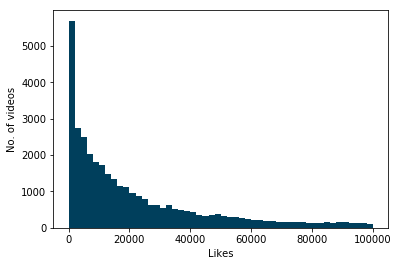

In [19]:
fig, ax = plt.subplots()
_ = sns.distplot(df[df["likes"] <= 1e5]["likes"], kde=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Likes", ylabel="No. of videos")

### 结论：由直方图看到 热门视频 "likes"的数量大部分集中在0 ~100,000左右，所以为了更详细地展示数据，下面画出了100,000以下"likes"的分布；由盒图看到离群点较多，大部分分布在1百万到3百万之间；由qq图看出，数据没有近似地在一条直线附近，即不符合正态分布

### （3）"dislikes"属性统计

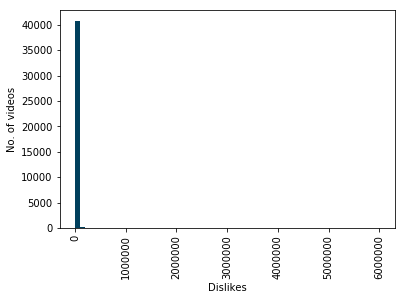

In [20]:
plt.rc('figure.subplot', wspace=0.9)
fig, ax = plt.subplots()
_ = sns.distplot(df["dislikes"], kde=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, 
                 bins=np.linspace(0, 6e6, 61), ax=ax)
_ = ax.set(xlabel="Dislikes", ylabel="No. of videos")
_ = plt.xticks(rotation=90)

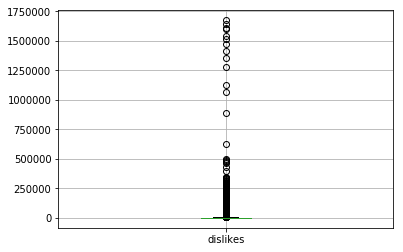

In [21]:
pd.DataFrame({"dislikes":df["dislikes"]}).boxplot()

((array([-4.14586123, -3.93796769, -3.8245419 , ...,  3.8245419 ,
          3.93796769,  4.14586123]),
  array([      0,       0,       0, ..., 1611043, 1643059, 1674420])),
 (7562.616923629906, 3711.400888910593, 0.2604903183766137))

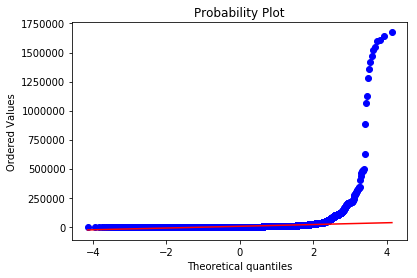

In [22]:
stats.probplot(df["dislikes"], dist="norm", plot=plt)

### 结论：由直方图看到 热门视频 "dislikes"的数量大部分集中在17000左右；由盒图看到离群点较少，大部分分布在370000以下；由qq图看出，数据没有近似地在一条直线附近，即不符合正态分布

### （4） "comment_count"（评论数量）属性统计

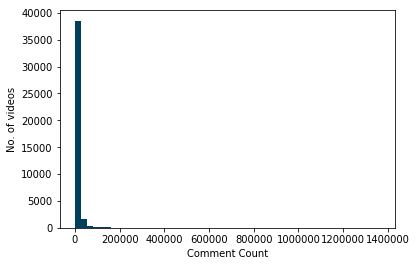

In [23]:
fig, ax = plt.subplots()
_ = sns.distplot(df["comment_count"], kde=False, rug=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Comment Count", ylabel="No. of videos")

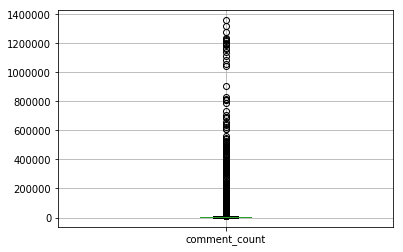

In [24]:
pd.DataFrame({"comment_count":df["comment_count"]}).boxplot()

((array([-4.14586123, -3.93796769, -3.8245419 , ...,  3.8245419 ,
          3.93796769,  4.14586123]),
  array([      0,       0,       0, ..., 1281094, 1321281, 1361580])),
 (15059.357244226177, 8446.803682629607, 0.40229355906305814))

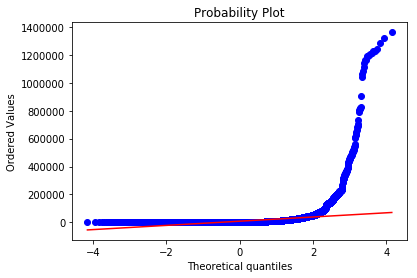

In [25]:
stats.probplot(df["comment_count"], dist="norm", plot=plt)

### 结论：由直方图看到 热门视频 "lcomment_count"（评论）的数量大部分集中在25000左右；由盒图看到离群点较多，大部分分布在550000以下；由qq图看出，数据没有近似地在一条直线附近，即不符合正态分布

## 三、缺失值处理

#### 由上面分析df.info()得到的数据集信息可知，除“description”标称属性外，其余属性均无缺失值,故考虑到处理的意义，此处仅采用删除缺失值和用最高频率值代替的方法处理缺失值（对于题目要求中的另外两种缺失值处理方法在wine数据集分析中给出了更为详细的处理过程），且由于这里是标称属性缺失，故没有给出可视化分析，仅给出处理后缺失值个数输出为0，证明处理成功。

### 1、剔除缺失值

In [26]:
description_2=df["description"].dropna()
description_2.isnull().sum()

0

### 2、用最高频率值填补缺失值

In [27]:
description_3 = df["description"].fillna(df["description"].mode()[0])
print(description_3.isnull().sum())

0


### 3、用空字符串填补缺失值

In [28]:
df["description"] = df["description"].fillna(value="")
df["description"].isnull().sum()

0